In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1,h2 {
    text-align: center;
    background-color: pink;
    padding: 20px;
    margin: 0;
    color: black;
    font-family: ariel;
   
}

h3 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: gold;
}

body, p {
    font-family: ariel;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
    
}

h1, h2, h3, h4, h5, h6 {
  background: #D4D4D4;
  border-top: 1px solid gray;
  border-bottom: 1px solid gray;
  font-weight: normal;
  padding-left: 2px;
  padding-right: 2px;
}
blockquote {
  background: #E6F2E6;
  border-left: 3px solid #408040;
  font-style: italic;
  padding-left: 5px;
  margin-left: 2px;
}
pre {
  background: #E0F0FF;
  border-left: 5px solid #55AAFF;
  padding: 5px;
  margin-left: 2px;
}
code {
  background: #E0F0FF;
  font-family: JetBrains Mono NL, Courier New, Monospaced;
  font-size: 0.9em;
}
table {
  border-spacing: 0px;
  border-right: 1px solid gray;
  border-bottom: 1px solid gray;
}
th, td {
  border-left: 1px solid gray;
  border-top: 1px solid gray;
}
th {
  background: #D4D4D4;
  font-weight: 600;
}
ul {
  margin-left-ltr: 20px;
  margin-right-rtl: 20px;
}
ol {
  margin-left-ltr: 25px;
  margin-right-rtl: 25px;
}
</style>
""")

# Predictive Maintenance: Enhancing Aviation Safety and Efficiency Through Proactive Measures

In the dynamic world of aviation, where reliability and safety are paramount, the development of a robust regression model for predicting the remaining useful life of critical aircraft components stands as a crucial endeavor. Drawing upon historical maintenance data, flight conditions, and sensor readings, such a model emerges as a strategic tool for proactive maintenance planning, with far-reaching implications for minimizing unscheduled downtime and optimizing operational efficiency.

### The Stakes:
Consider the consequences of unplanned maintenance, flight delays and cancellations. It's not merely an inconvenience, it’s a financial burden that resonates throughout the entire aviation ecosystem. The domino effect of a single unscheduled maintenance event can disrupt an airline's entire schedule, affecting passengers, cargo, and crew. The economic toll is substantial, and the repercussions extend well beyond the financial realm.

### Real-World Incidents: 
Taking a look at the notorious case of a major airline grappling with unforeseen engine failures, the United Airlines. Without predictive maintenance models in place, this airline faced cascading issues, from last-minute rescheduling to disgruntled passengers and even going as far as costing human lives. The 1989 United Airlines Flight 232 and the recent January 18, 2023 incident at Modesto City-County Airport underscore the critical need for predictive maintenance in aviation. In both cases, engine failures led to catastrophic outcomes. The investigation into Flight 232 identified a manufacturing flaw, which a predictive maintenance model could have detected, enabling proactive intervention. The financial toll was staggering - not just in the immediate costs of repairing or replacing the faulty components, but in the long-term damage to the airline's reputation and customer trust. The 2023 incident, despite available technology, resulted in a fatal crash, highlighting the persistent need for comprehensive measures. The urgent call is for the widespread adoption of predictive maintenance strategies, leveraging historical data and sensor readings, to prevent unforeseen technical failures, enhance passenger safety, and improve operational efficiency in aviation. 

### Proactive Approach:
Throughout their operational lifespan, aircraft components undergo degradation that directly impacts their reliability and performance. This machine learning initiative aims to establish a comprehensive framework for predicting the remaining useful life (RUL) of aircraft based on their entire life cycle data. The objective is to facilitate informed maintenance decisions. I have chose to implement two regression models, Linear Regression and Random Forest and will evaluate them using NASA's C-MAPSS dataset from Kaggle, to assess engine lifetime. This is generally a regression task, as the target is a continous list of numbers. I will therefore use a LinearRegression model which is normally used for regression tasks like this one and also i will use Random Forest which are normally used for classification problems and compare the two algorithms to see if Random Forest will out perform Linear regression despite the nature of the task at hand-regression. 

## IMPORT NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


from sklearn import datasets
from sklearn.model_selection import KFold


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
scaler = MinMaxScaler()




C:\Users\patty\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [4]:
#LOAD THE DATA

df_train = pd.read_csv(('CMaps/train_FD001.txt'), sep='\s+', header=None,index_col=False, names=col_names)
df_test = pd.read_csv(('CMaps/test_FD001.txt'), sep='\s+', header=None, names=col_names)
df_test_RUL = pd.read_csv(('CMaps/RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

Initiating our analysis, we visually examine the data. The training dataset captures information until engine failure, marking the maximum cycle as the engine's lifespan. However, the training set doesn't cover the failure point, making the Remaining Useful Life (RUL) file crucial. This file provides insights into the time remaining until failure, forming the basis for our predictions. The FD001 dataset comprises time series data from 100 turbofan engines, each featuring 21 sensors and 3 settings. Within each time series, engines start in normal conditions and fail by the series' end. Each dataset row represents a snapshot from a single operation cycle.

In [5]:
df_train.head()

,engine,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
df_test_RUL.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [7]:
df_train.describe(include= 'all').T

,count,mean,std,min,25%,50%,75%,max
engine,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


The engine unit numbers range from 1-100 as expected however, the mean and quantities of the unit numbers do not align precisely with a continuous vector from 1 to 100. This discrepancy arises from variations in the maximum cycles for each unit, resulting in a different number of rows. Analyzing the maximum time for the cyles, cycle, we see that the engine faiing earliest did so after 128cycles, while the engines with the longest operation broke down after 362 cycles. 

**From the statistics above, we can observe that the datset:**
- includes information for 20 631 engines
- engine cycles have a mean of 51.51 with a standard deviatio of 29.23
- the cycles range from 1 to 362, with a mean of 108.81 and a standard deviation of 68.88
- settings_1 and settings_2 has a mean close to zero with a small standard deviation, while settings_3 has a constant value of 100 for all entries.
- various sensor readings show consistent mean value with low standard deviations for example, s_1 has a constant value 518.67 while s_2, s_3 and s_4 have mean ranging from 642-1408 with negligible standard deviations.


**FINDING CORRELATIONS BETWEEN THE FEATURES OF THE DATASET**
From the heatmap below, we can see that there is a strong correlation between s_9 and s_14, suggesting that as s_9 increses, s_14 tens to increse proportionally.

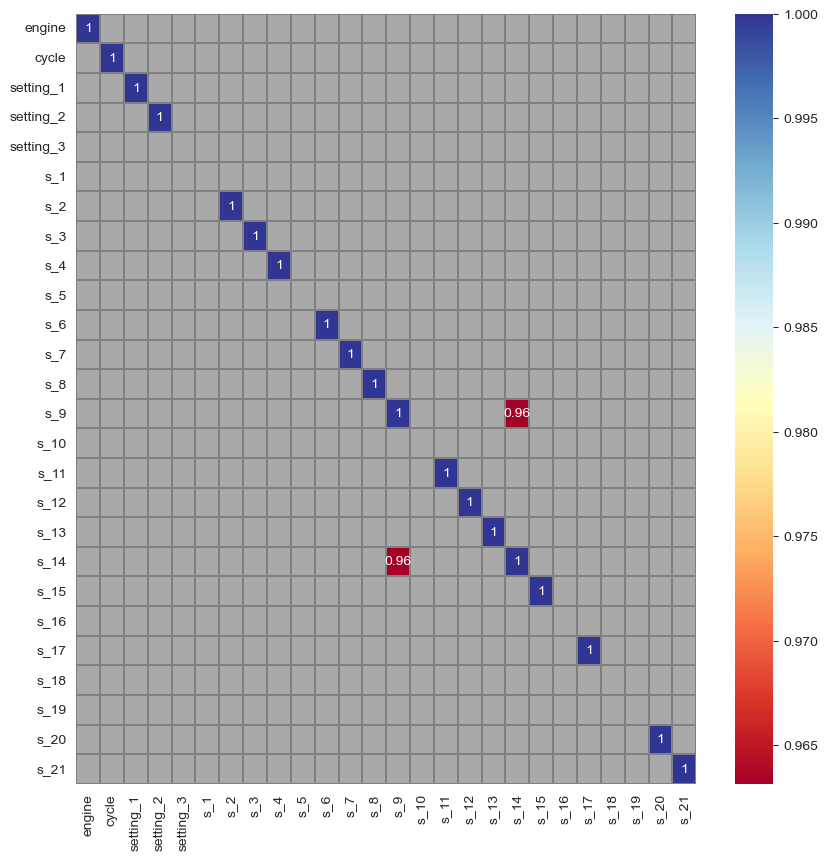

In [8]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("darkgrid", {"axes.facecolor": ".2"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='grey').set_facecolor('darkgrey')

In [9]:
features = list(df_train.columns)
# check for missing data
for feature in features:
    print(feature + " - " + str(len(df_train[df_train[feature].isna()])))

engine - 0
cycle - 0
setting_1 - 0
setting_2 - 0
setting_3 - 0
s_1 - 0
s_2 - 0
s_3 - 0
s_4 - 0
s_5 - 0
s_6 - 0
s_7 - 0
s_8 - 0
s_9 - 0
s_10 - 0
s_11 - 0
s_12 - 0
s_13 - 0
s_14 - 0
s_15 - 0
s_16 - 0
s_17 - 0
s_18 - 0
s_19 - 0
s_20 - 0
s_21 - 0


In [10]:
#Rul analysis(Maximum Life for each Engine)
max_time_cycles = df_train.groupby('engine').agg({'cycle':'max'})
max_time_cycles.rename(columns={'cycle':'life'}, inplace= True)
max_time_cycles.head()

,life
engine,
1,192
2,287
3,179
4,189
5,269


In [11]:
df_train=df_train.merge(max_time_cycles,how='left',on=['engine'])
df_train['RUL']=df_train['life']-df_train['cycle']
df_train.drop(['life'],axis=1,inplace=True)
df_train['RUL'][df_train['RUL']>125]=125
df_train.head()

C:\Users\patty\AppData\Local\Temp\ipykernel_17040\1040732277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['RUL'][df_train['RUL']>125]=125


,engine,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,125
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,125
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,125
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,125
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,125


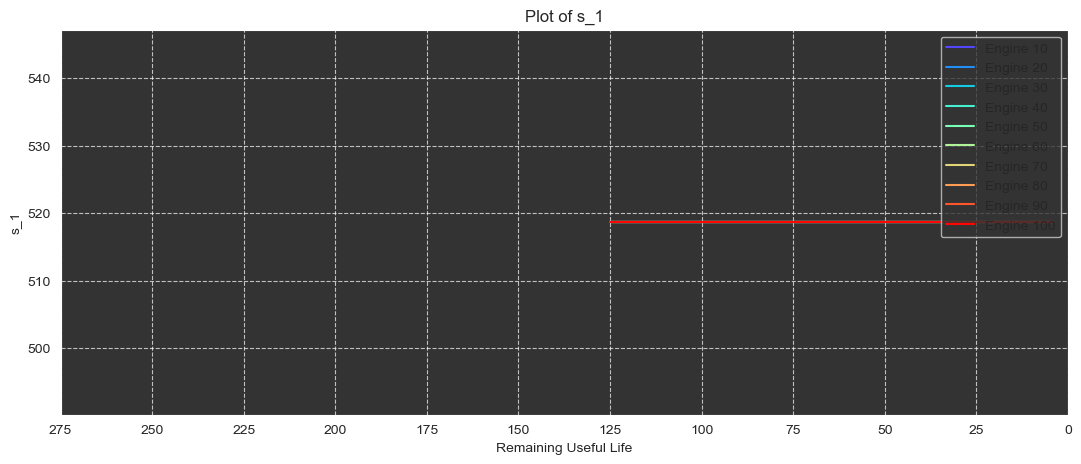

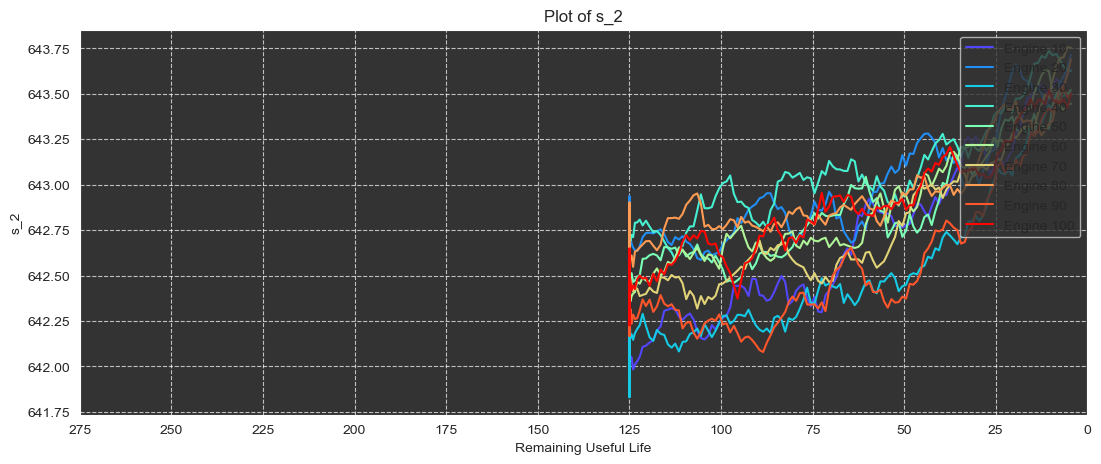

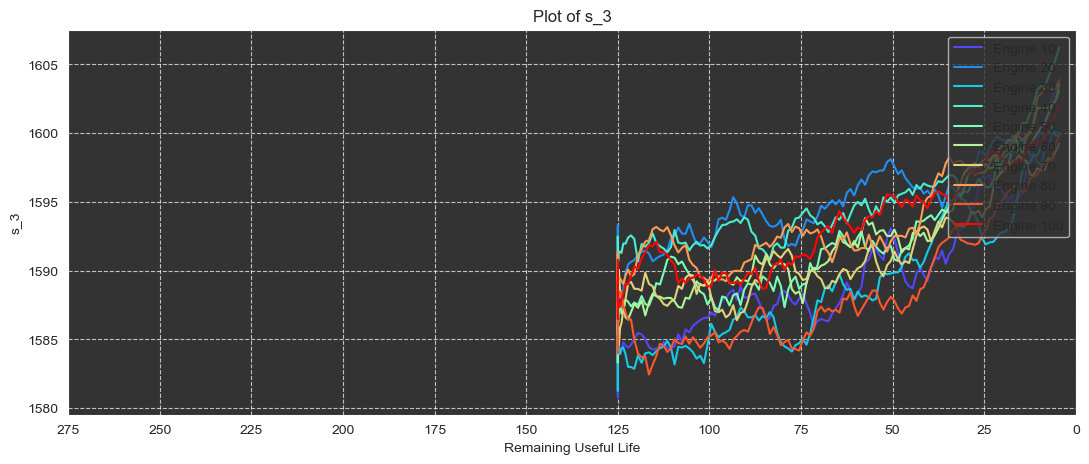

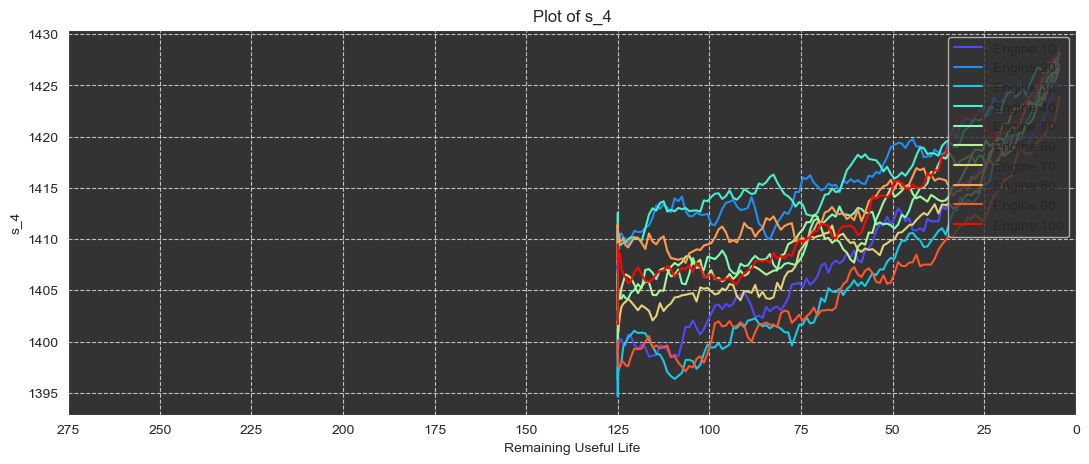

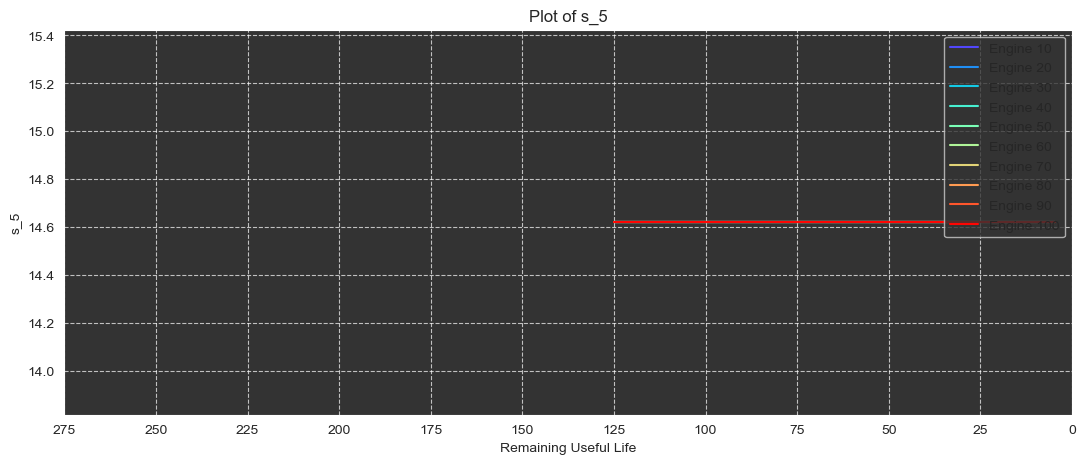

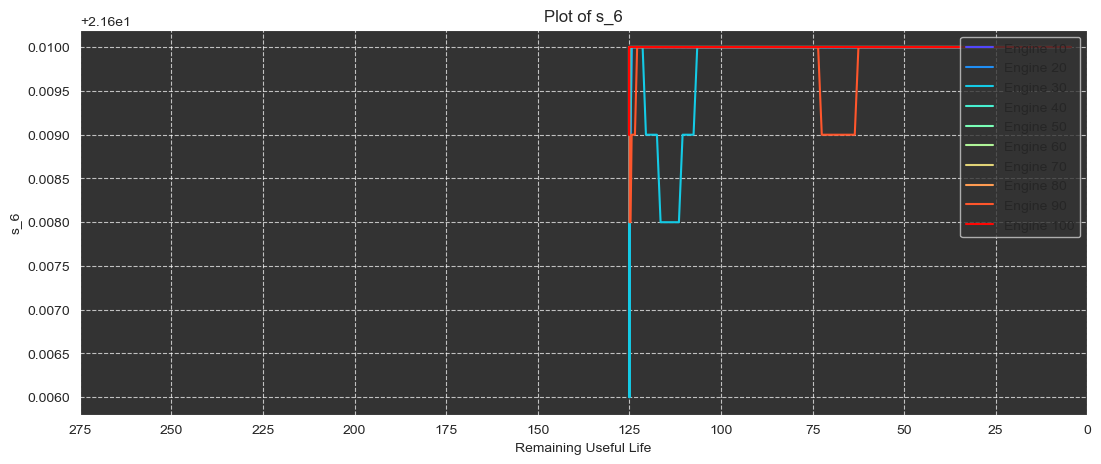

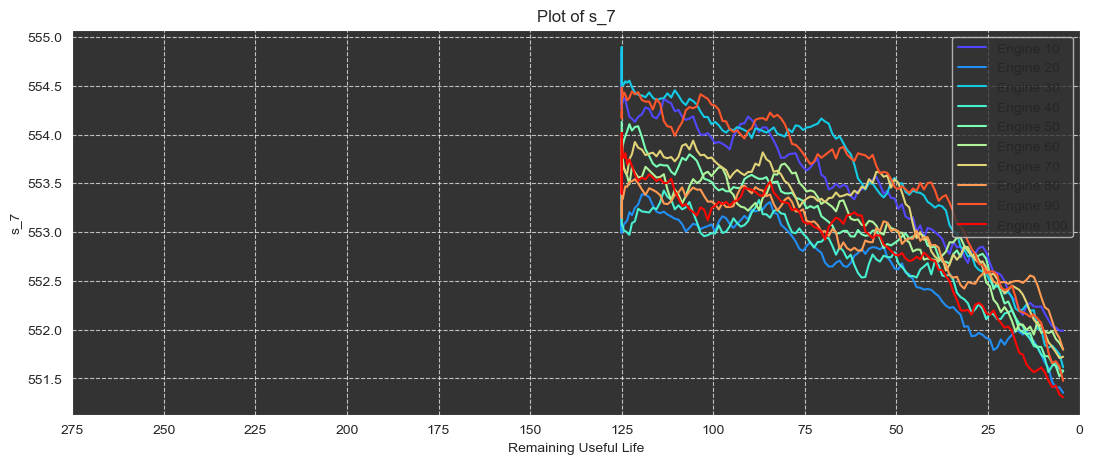

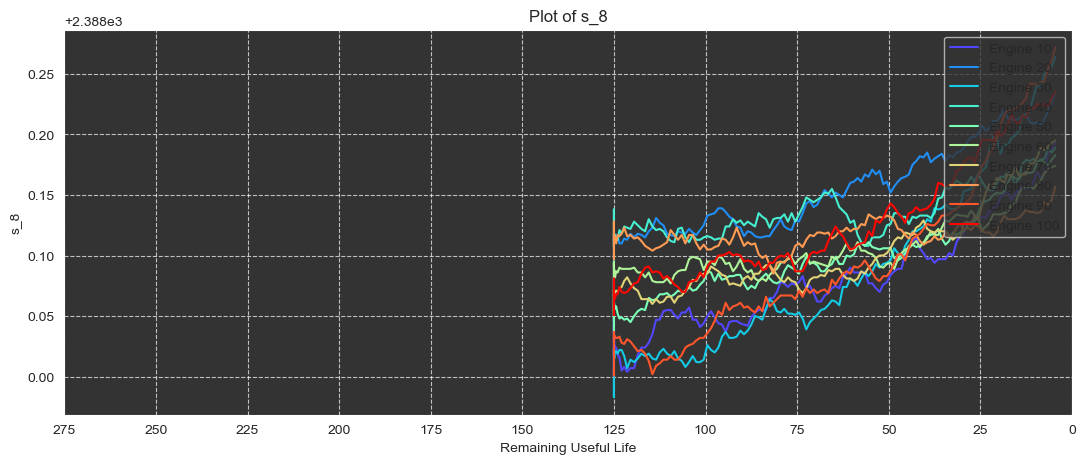

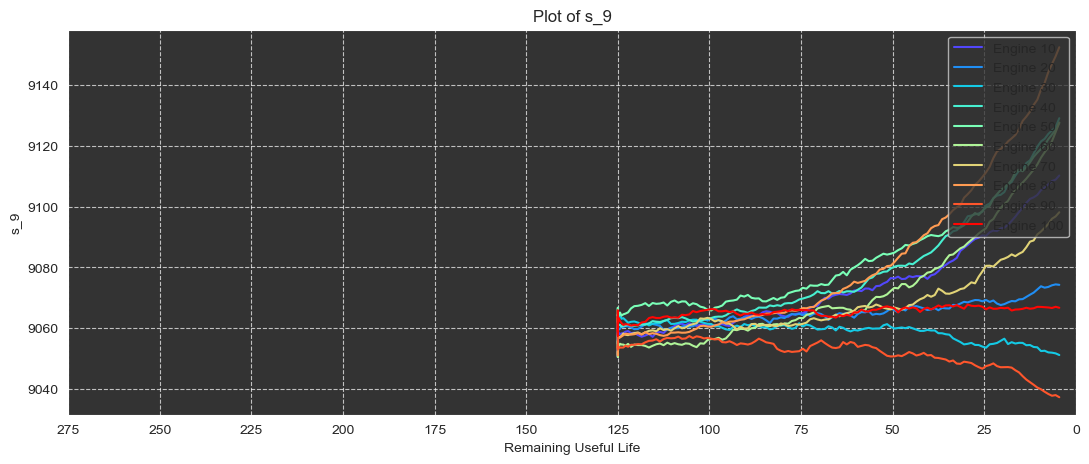

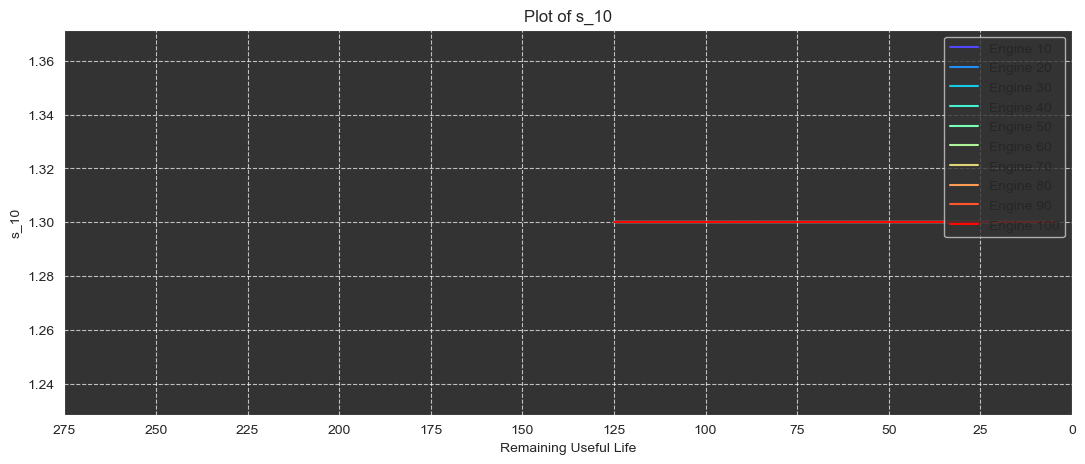

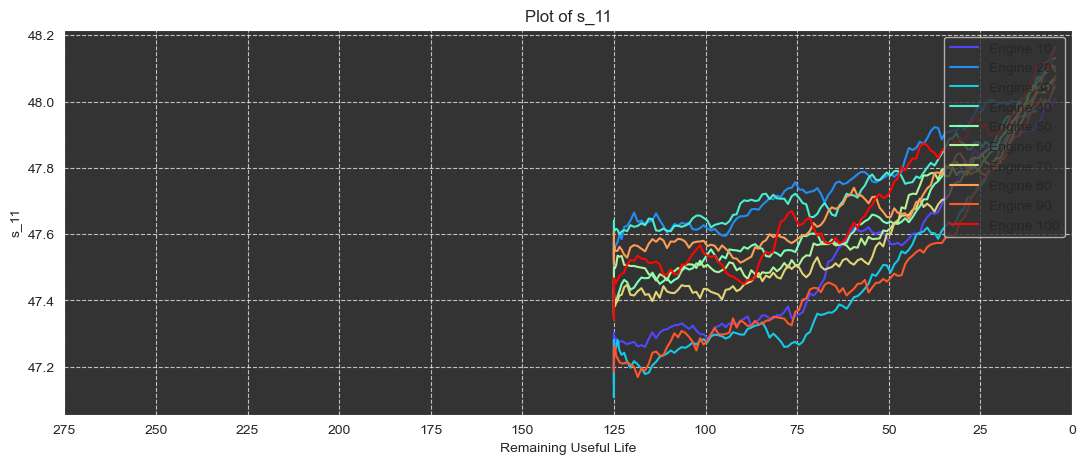

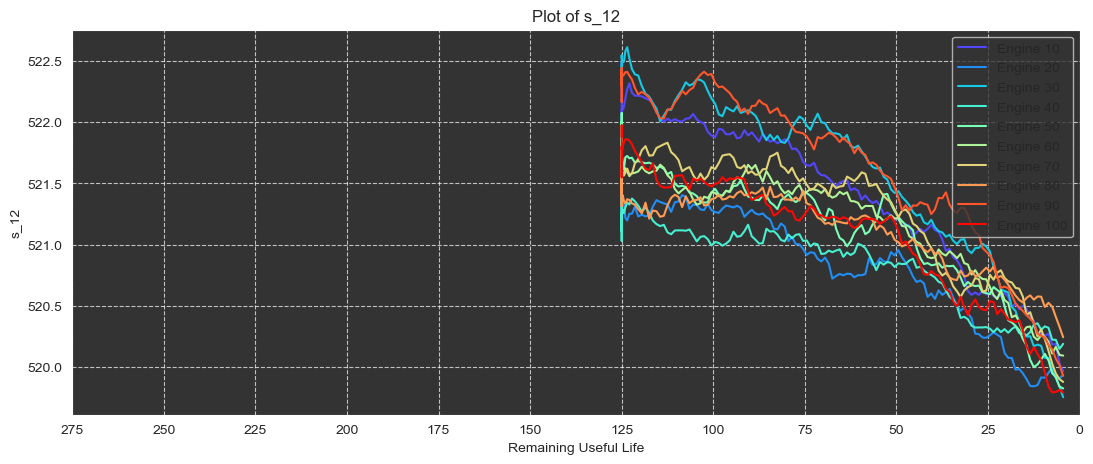

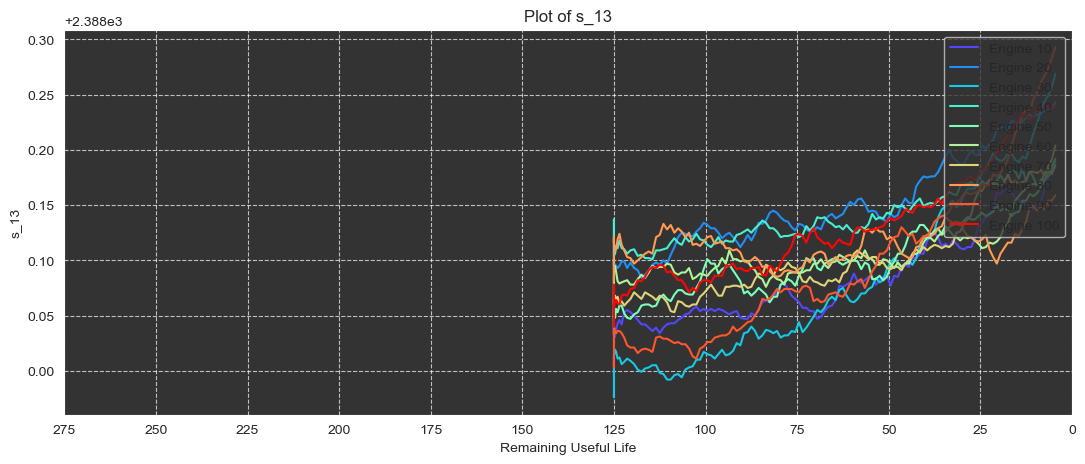

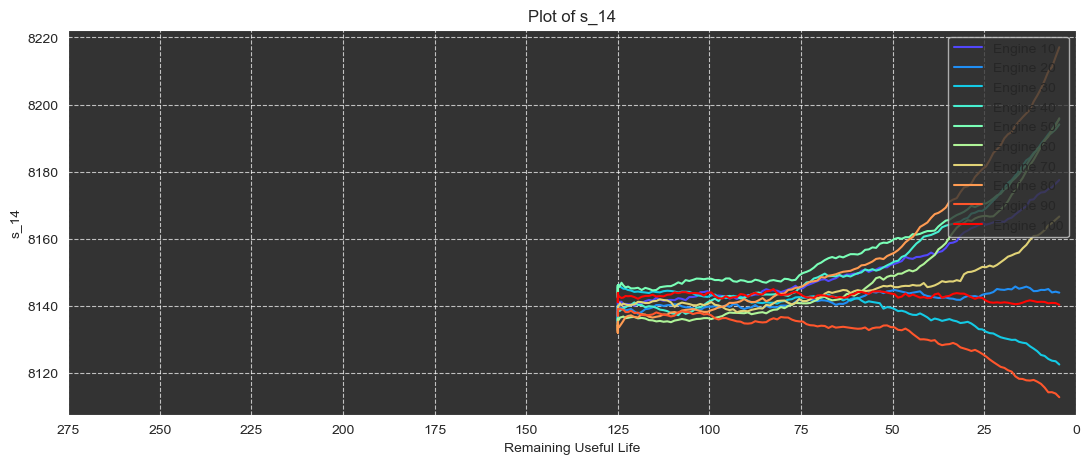

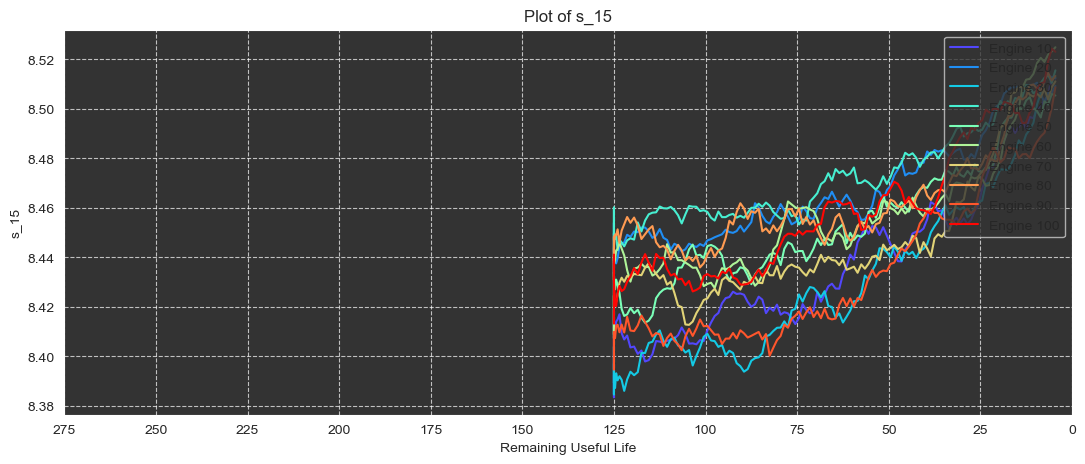

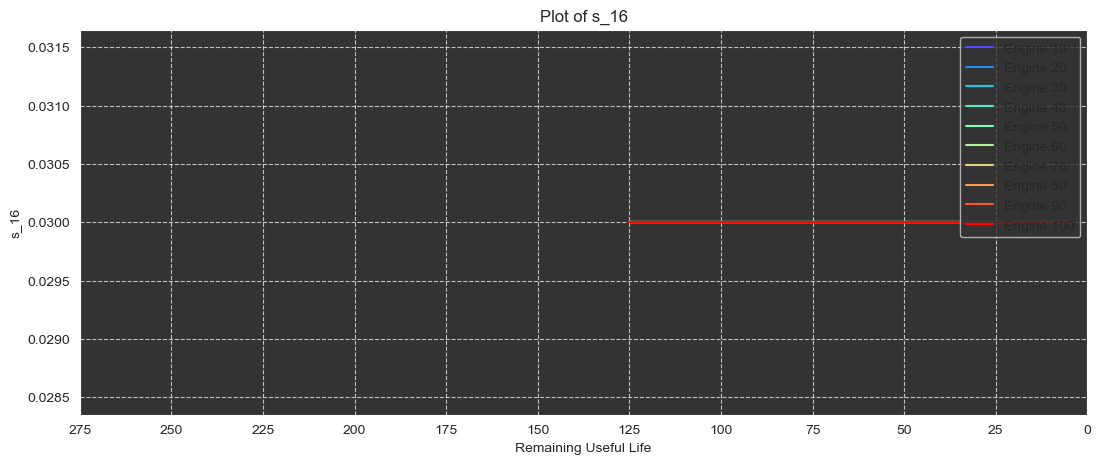

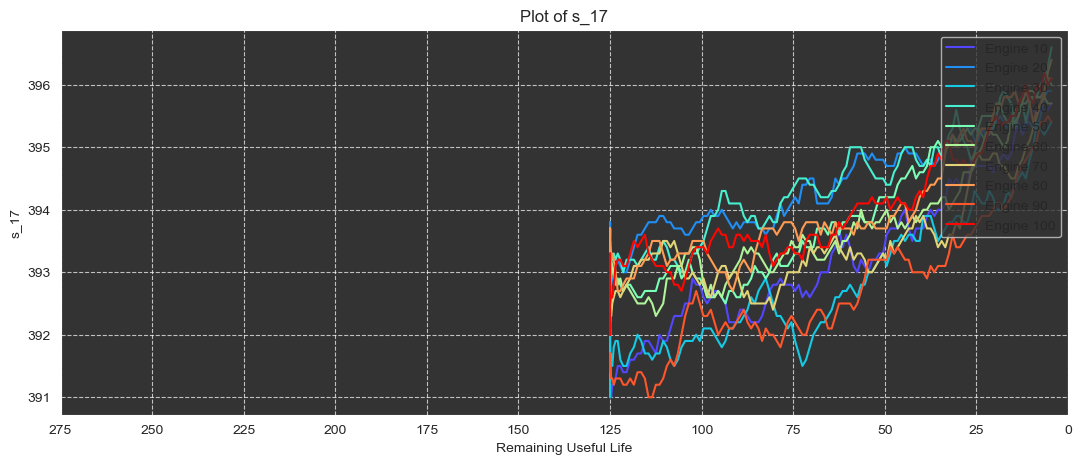

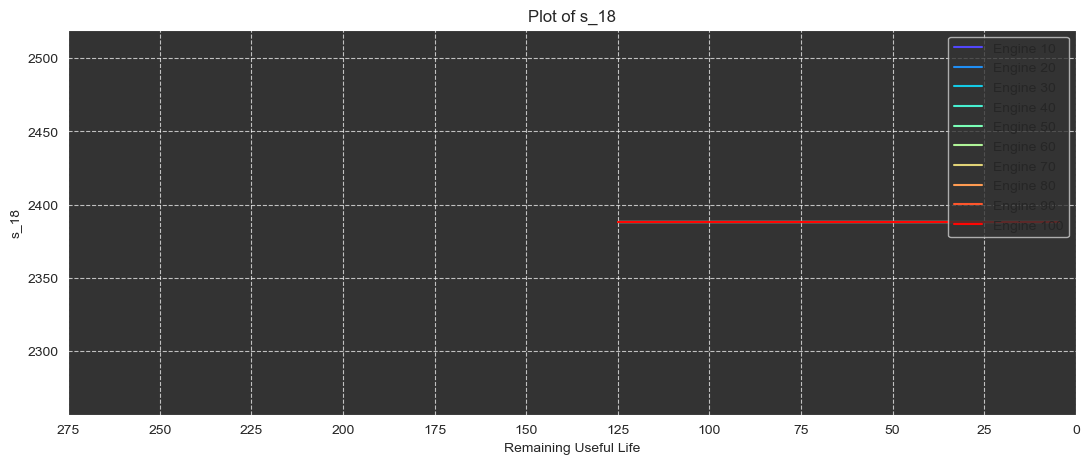

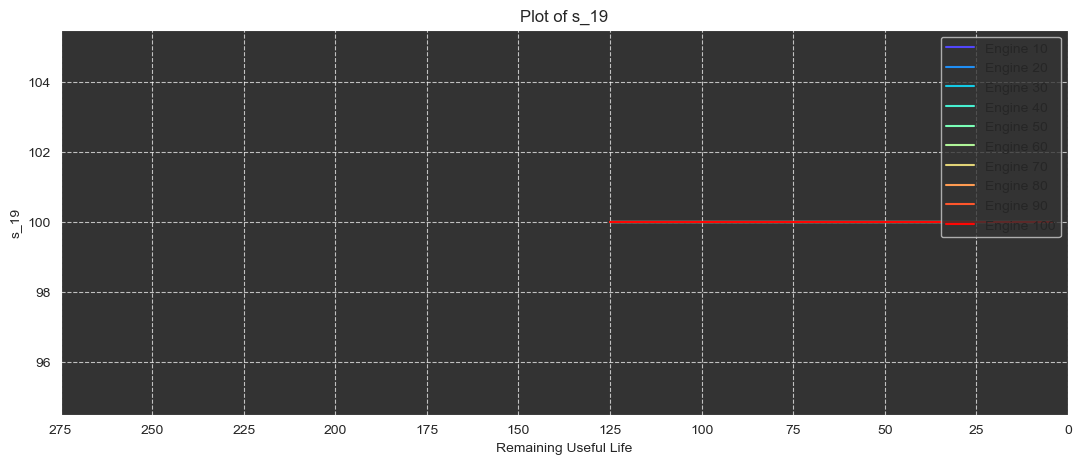

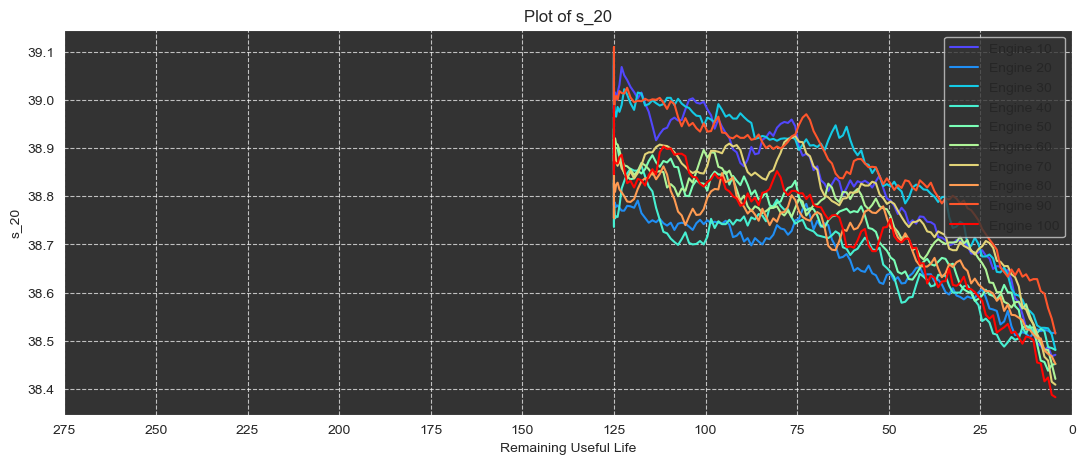

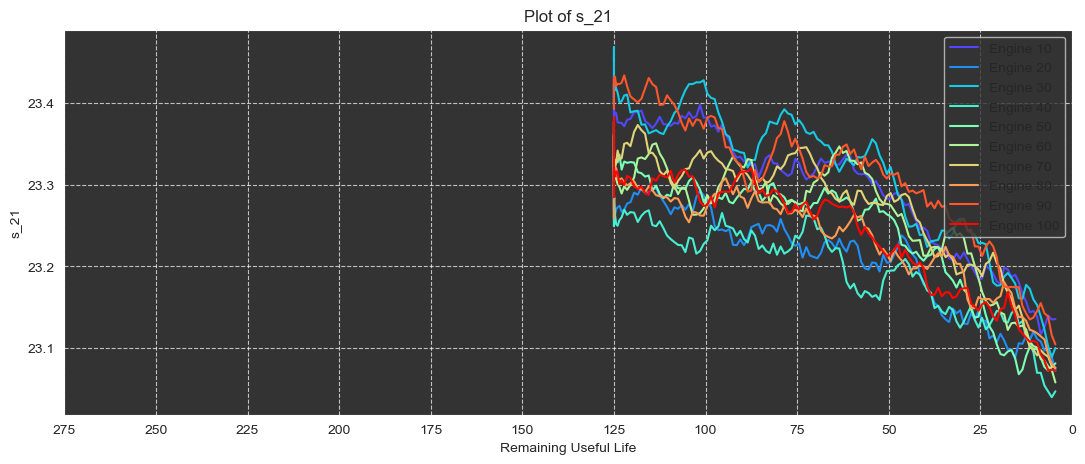

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_signal(df, signal_name):
    if 'RUL' not in df.columns or signal_name not in df.columns:
        print("Sensor with constant value"+ "s_"+signal_name)
        return

    plt.figure(figsize=(13, 5))
    engines = df['engine'].unique()

    cmap = plt.get_cmap('rainbow')  

    for i, engine in enumerate(engines):
        if engine % 10 == 0 and df[df['engine'] == engine].shape[0] >= 10:
            color = cmap(i / len(engines))  
            plt.plot(
                'RUL',
                signal_name,
                data=df[df['engine'] == engine].rolling(10).mean(),
                label=f'Engine {engine}',
                color=color,
                linestyle='-',
                marker='',
                linewidth=1.5
            )

    plt.xlim(250, 0)
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(signal_name)
    plt.xlabel('Remaining Useful Life')
    plt.title(f'Plot of {signal_name}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='upper right')  
    plt.show()

for i in range(1, 22):
    try:
        plot_signal(df_train, 's_' + str(i))
    except Exception as e:
        print(f"An error occurred for 's_{i}': {e}")


**From the plots above, we can see that:**
- Sensors 1,5,10,16,18,19, are constant, hence they do not influence the RUL and we can drop them
- We can remove engines life which are less than 125 as the RUl forecasting is mainly useful to the end of the engine's life
- The sensors arent well distributed and have many outliers therefore we will need to scale  the data

In [13]:
# drop the sensors with constant values
sens_const_values = []
for feature in list(setting_names + sensor_names):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)
df_test.drop(sens_const_values,axis=1,inplace=True)

['setting_3', 's_1', 's_5', 's_10', 's_16', 's_18', 's_19']


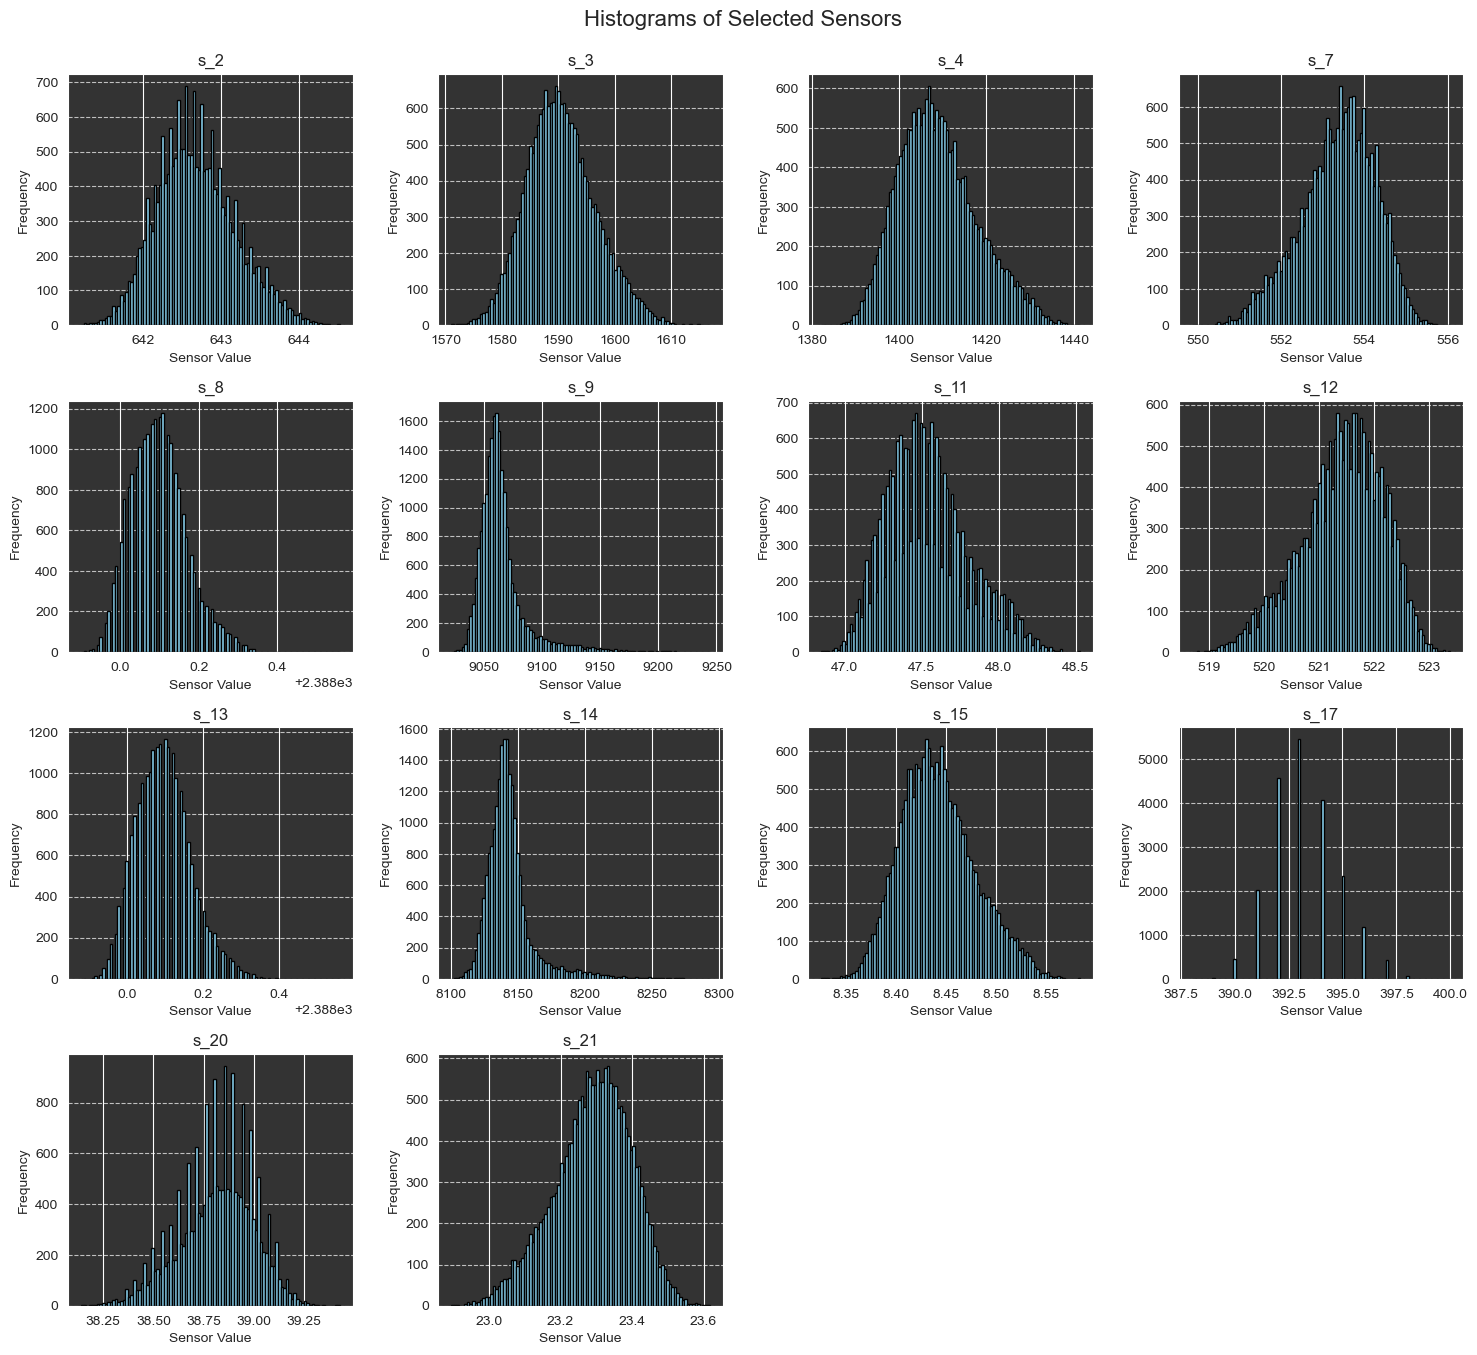

In [14]:

sensor_names = ['s_{}'.format(i) for i in range(1, 22) if i not in [1, 5, 6, 10, 16, 18, 19]]
df_subset = pd.DataFrame(df_train, columns=['s_{}'.format(i) for i in range(1, 22)])[sensor_names]
axarr = df_subset.hist(bins=100, figsize=(18, 16), color='skyblue', edgecolor='black')
for ax in axarr.flatten():
    ax.set_xlabel("Sensor Value")
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
# Set a common title for all subplots
plt.suptitle("Histograms of Selected Sensors", y=0.92, fontsize=16)
plt.show()

# MODELLING AND EVALUATION

In [15]:
selected_features = []

import statsmodels.api as sm

def backward_selection_regression(features, target, initial_list=[], pvalue_threshold=0.05, verbose=True):
    included_features = list(features.columns)
    
    while True:
        changed = False
        model = sm.OLS(target, sm.add_constant(pd.DataFrame(features[included_features]))).fit()
        # use all coefficients except intercept
        p_values = model.pvalues.iloc[1:]
        worst_p_value = p_values.max()  
        
        if worst_p_value > pvalue_threshold:
            changed = True
            worst_feature = p_values.idxmax()
            included_features.remove(worst_feature)
            if verbose:
                print(f"Worst Feature: {worst_feature}, {worst_p_value}")
                
        if not changed:
            break
    
    selected_features.append(included_features)
    print(f"\nSelected Features:\n{selected_features[0]}")

# We apply backward regression function to our training data
X_train_data = df_train.iloc[:, 1:-1]
y_train_data = df_train.iloc[:, -1]

backward_selection_regression(X_train_data, y_train_data)
print(selected_features)

feature_names = selected_features[0]
np.shape(X_train_data)
len(feature_names)


Worst Feature: setting_1, 0.3589529590198912
Worst Feature: setting_2, 0.1822985365467588

Selected Features:
['cycle', 's_2', 's_3', 's_4', 's_6', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']
[['cycle', 's_2', 's_3', 's_4', 's_6', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']]


16

In [16]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)

#I did not use the python traintest split because i have different data sets for training and testing
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]
X_train.head()

,cycle,s_2,s_3,s_4,s_6,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
0,1,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,2,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,3,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,4,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,5,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [17]:
#other sensors are not well distributed and there are many outliers,therefore the need to scale our data
X_train_s = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### MY CUSTOM REGRESSION MODEL

In [18]:


class MyLinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000, tol=1e-4, early_stopping=False, patience=10, alpha=0.01):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tol = tol
        self.early_stopping = early_stopping
        self.patience = patience
        self.weights = None
        self.bias = None
        self.alpha = alpha  # Regularization strength

    def fit(self, X, y):
        self.num_samples, self.num_features = X.shape
        self.weights = np.zeros(self.num_features)
        self.bias = 0
        prev_loss = float('inf')
        patience_count = 0
        errors = []

        for iteration in range(1, self.max_iterations + 1):
            yhat = self.predict(X)
            loss = np.sum((y - yhat) ** 2) / (2 * self.num_samples) + (self.alpha / 2) * np.sum(self.weights**2)
            errors.append(loss)

            if abs(prev_loss - loss) < self.tol:
                print(f"Converged at iteration {iteration}, Loss: {loss:.4f}")
                break

            self.gradient_descent(X, y)
            prev_loss = loss

            if self.early_stopping and iteration > 1:
                if loss > prev_loss:
                    patience_count += 1
                else:
                    patience_count = 0

                if patience_count >= self.patience:
                    print(f"Early stopping at iteration {iteration}, Loss: {loss:.4f}")
                    break

        return self

    def gradient_descent(self, X, y):
        yhat = self.predict(X)
        dW = - (2 * (X.T).dot(y - yhat)) / self.num_samples + self.alpha * self.weights
        db = -2 * np.sum(y - yhat) / self.num_samples

        self.weights -= self.learning_rate * dW
        self.bias -= self.learning_rate * db

    def predict(self, X):
        return X.dot(self.weights) + self.bias


In [19]:
models=["MyLinearRegression", "Sklearn LinearRegression", "RndomForestClassifier","RandomForesrRegressor", "ForestClassifier Kfold","ForesrRegressorKfold"]
rmses= []
r2s= []
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    rmses.append(rmse)
    r2s.append(variance)

In [20]:
lr = MyLinearRegression(early_stopping=True)
lr.fit(X_train_s, y_train)
y_predict = lr.predict(X_test)
evaluate(y_test,y_predict, label='test')
final_weights= lr.weights
final_bias= lr.bias

print(f"Final Weights: {final_weights}")
print(f"Final Bias: {final_bias}")


test set RMSE:23.39084012299679, R2:0.6831657690542492
Final Weights: [-33.85410901 -10.73844969  -8.65053836 -13.40274325  19.96126807
  37.27392871  -3.52508944 -13.03667043 -15.98333094  40.31753108
  -2.79358966 -10.2780183  -11.33471172  -8.6526586   34.90299563
  36.55058698]
Final Bias: 30.99420509188627


# HOW MY MODELS WORKS
**Initialization**: Hyperparameters such as learning rate (learning_rate), maximum number of iterations (max_iterations), tolerance (tol), early stopping (early_stopping), patience for early stopping (patience), and regularisation strength (alpha) are initialised in the constructor (__init__). Both the weights (self.weights) and the bias (self.bias) are set to None.

The **fit method** is in charge of training the linear regression model. It takes as inputs input features X and target values y. It initialises the weights and bias, then updates them iteratively using gradient descent to minimise the mean squared error loss function. The loop is repeated until convergence is obtained or the maximum number of iterations is reached. If early stopping is allowed, the training can be terminated if the loss does not improve after a certain number of iterations (patience).

**Gradient Descent**: The gradient_descent method computes and updates the gradients of the loss function with respect to the weights and bias. The phrase regularisation is used to prevent overfitting.

**Prediction**: Using the learnt weights and bias, the predict technique accepts input features X and returns the expected target values.

Lastly, I created a MyLinearRegression instance with early stopping enabled and trained the model with training data (X_train_s and y_train) and tested it on the test set (X_test and y_test) then using hte **evaluate function,** printed out the final weights, bias, and evaluation metrics such as (RMSE) and R2

To summarize it all, the model employs gradient descent to update the weights and bias iteratively in order to minimise the mean squared error loss function. Early stopping and regularisation are used to improve model generalisation and avoid overfitting. While the evaluation metrics provide information about how the model performed on the test set.




### SKLEARN REGRESSION MODEL

In [21]:
regression_model = LinearRegression()
regression_model.fit(X_train_s,y_train) 
y_predict =regression_model.predict(X_test)
evaluate(y_test,y_predict, label='test')
final_weights= lr.weights
final_bias= lr.bias
# Print the results
print(f"Final Weights: {final_weights}")
print(f"Final Bias: {final_bias}")


test set RMSE:22.52415443610538, R2:0.7062097027699569
Final Weights: [-33.85410901 -10.73844969  -8.65053836 -13.40274325  19.96126807
  37.27392871  -3.52508944 -13.03667043 -15.98333094  40.31753108
  -2.79358966 -10.2780183  -11.33471172  -8.6526586   34.90299563
  36.55058698]
Final Bias: 30.99420509188627


### COMPARING MY MODEL TO SKLEARN MODEL
Both models converged to similar final weights and biases, demonstrating a shared understanding of the relationships between features and the target variable. Notably, in my own regression model, I manually set the learning rate and regularisation strength, indicating a potential area for development in order to attain optimal results. Grid search or randomised search could be used to automate the search for optimal hyperparameters.

Furthermore, it appears that there is opportunity for improvement through cross-validation approaches such as L1 or L2 Regularisation, which can improve model robustness and reduce overfitting. Although attempts to incorporate this resulted in an AttributeError during testing, efforts to overcome this issue were futile, resulting in its removal from the model. I feel that addressing these flaws in the future will allow my model to reach its full potential, potentially outperforming the scikit-learn model.


# RANDOM FOREST CLASSIFIER

test set RMSE:25.05613697280568, R2:0.6364462030022416


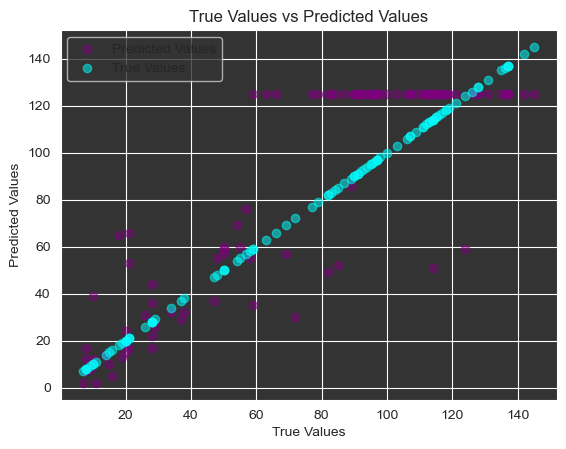

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train_s, y_train)
y_predict_rfc = rfc.predict(X_test)
evaluate(y_test, y_predict_rfc, label='test')

plt.scatter(y_test, y_predict_rfc, alpha=0.5, c='purple', label='Predicted Values')
plt.scatter(y_test, y_test, alpha=0.5, c='cyan', label='True Values')

plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()  # Show legend with labels

plt.show()

### EVALUATION OF RANDOMFORESTREGRESSOR WITHOUT K-FOLD VALIDATION

test set RMSE:17.87086833368765, R2:0.8150596113337104


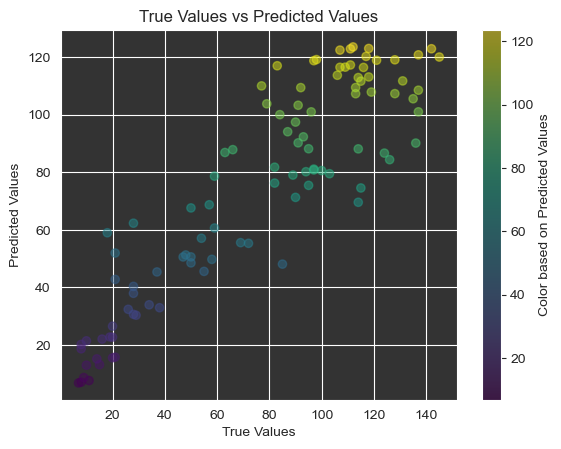

In [23]:
rfr = RandomForestRegressor(max_features="sqrt", random_state=42)
rfr.fit(X_train_s, y_train)
y_predict_rfr = rfr.predict(X_test)
evaluate(y_test, y_predict_rfr, label='test')

colors = y_predict_rfr 

plt.scatter(y_test, y_predict_rfr, c=colors, cmap='viridis', alpha=0.5)
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

cbar = plt.colorbar()
cbar.set_label('Color based on Predicted Values')

plt.show()

In [24]:
from sklearn.model_selection import KFold

def evaluate(model,k_folds):
    X =df_train.iloc[:, 1:-1]
    y= df_train.iloc[:, -1]
    kf = KFold(n_splits=k_folds ,shuffle=True, random_state=42)
    mse_scores=[]#store perfomance metrices
    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)
        mse = mean_squared_error(y_test,y_hat)
        mse_scores.append(mse)
        variance = r2_score(y_test, y_hat)
    average_mse= np.mean(mse_scores)
    rmse = np.sqrt(average_mse)
    rmses.append(rmse)
    r2s.append(variance)
    print(f'RMSE across {k_folds}-fold cross-validation for{model} is : {rmse:.4f} and its R2 is {variance:.4f}')

### EVALUATION OF RANDOMFORESTREGRESSOR WITH K-FOLD VALIDATION

We can evidently see that the alorithm performs better, its has a lower RMSE and a higher variance, R2 with k-fold cross validation that without, suggesting that the model generalizes well to unseen data and is less likely to be overfitting the training data.

In [35]:
evaluate(rfc,4)

RMSE across 4-fold cross-validation forRandomForestClassifier() is : 24.0891 and its R2 is 0.6799


In [36]:
evaluate(rfr,4)

RMSE across 4-fold cross-validation forRandomForestRegressor(max_features='sqrt', random_state=42) is : 15.8517 and its R2 is 0.8555


In [27]:
print(models)

['MyLinearRegression', 'Sklearn LinearRegression', 'RndomForestClassifier', 'RandomForesrRegressor', 'ForestClassifier Kfold', 'ForesrRegressorKfold']


In [28]:
print(rmses)

[23.39084012299679, 22.52415443610538, 25.05613697280568, 17.87086833368765, 24.194099990150164, 15.851653369004541]


In [29]:
print(r2s)

[0.6831657690542492, 0.7062097027699569, 0.6364462030022416, 0.8150596113337104, 0.6786955932595592, 0.8555171881521846]


In [30]:
data = {
    "Model":models,
    "RMSE": rmses,
    "R2": r2s
}

In [33]:
print(data)
df = pd.DataFrame(data)

{'Model': ['MyLinearRegression', 'Sklearn LinearRegression', 'RndomForestClassifier', 'RandomForesrRegressor', 'ForestClassifier Kfold', 'ForesrRegressorKfold'], 'RMSE': [23.39084012299679, 22.52415443610538, 25.05613697280568, 17.87086833368765, 24.194099990150164, 15.851653369004541], 'R2': [0.6831657690542492, 0.7062097027699569, 0.6364462030022416, 0.8150596113337104, 0.6786955932595592, 0.8555171881521846]}


In [34]:
df.head(6)

,Model,RMSE,R2
0,MyLinearRegression,23.390840,0.683166
1,Sklearn LinearRegression,22.524154,0.706210
2,RndomForestClassifier,25.056137,0.636446
3,RandomForesrRegressor,17.870868,0.815060
4,ForestClassifier Kfold,24.194100,0.678696
5,ForesrRegressorKfold,15.851653,0.855517


### MODELS COMPARISON AND SUMMARY

The models have a comparable overall accuracy, but they are particularly good at forecasting Remaining Useful Life (RUL) when it is less than 50. Surprisingly, when applied to unsmoothed data, the models attain higher accuracy. This shows that the inherent noise in sensor readings contains significant information that can be used to make more accurate predictions. The models appear to benefit from the unfiltered, raw data, showing that subtle fluctuations in sensor inputs are important in improving prediction accuracy, especially for RUL values below 50.

The RandomForestRegressor clearly stands out in terms of performance measures, having the lowest RMSE and best R2 among the models in our evaluation. This dominance demonstrates not only accuracy, but also an unrivalled ability to capture the nuanced variance buried in the complicated life cycle data of aviation engines. The complexities of estimating the Remaining Useful Life (RUL) necessitate a sophisticated model, and the RandomForestRegressor, with its ensemble structure, rises to the occasion by elegantly unravelling intricate correlations within the data.


Furthermore, given the wide range of features that contribute to our target variable, the RandomForestClassifier emerges as a possibility. The prevalence of high-dimensional and non-linear interactions in our dataset may appear to correspond with the strengths of a classification model. However, this assumption runs aground when confronted with the essence of predicting RUL. The inherent nature of forecasting a continuous variable, such as the time till failure, gives the RandomForestRegressor a distinct advantage. Its higher performance over the RandomForestClassifier demonstrates the model's ability to handle the nuanced complexities associated with RUL prediction.

The RandomForestRegressor's solid cross-validation performance strengthens its position further, attesting to its remarkable generalisation capabilities on unknown data. In comparison, while the LinearRegressionModel performs somewhat worse than the RandomForestRegressor, it still produces good predictions.

A clear winner emerges from the comparison of the RandomForestRegressor and RandomForestClassifier. The  preference for regression corresponds to the intrinsically continuous nature of predicting RUL. Regression models, such as the RandomForestRegressor, excel at detecting the minor subtleties in RUL values, providing a more nuanced and accurate forecasting capability.

So here is my conclusion, while statistical indications may point us in the direction of the RandomForestRegressor, the heart of model selection is based on the fundamental structure of the prediction problem. The underlying properties of the problem influence the choice between regression and classification models. The ultimate question to be answered is not a categorical "Is RandomForestRegressor the best model?" but rather a nuanced examination of the nature of the prediction task—whether it favours regression or categorization. Choosing the best model requires careful consideration of the intrinsic demands of the predictive analytics activity.